In [176]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from scipy.stats import norm 
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings('ignore')

In [177]:
Gold=pd.read_csv("Gold_data.csv")

In [180]:
Gold

,date,price
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75
...,...,...
2177,2021-12-17,4394.40
2178,2021-12-18,4389.50
2179,2021-12-19,4389.50
2180,2021-12-20,4354.10


In [181]:
Gold[Gold.duplicated()]

,date,price


In [182]:
# making the month column as index
Gold.set_index('date',inplace=True)
Gold

,price
date,
2016-01-01,2252.60
2016-01-02,2454.50
2016-01-03,2708.10
2016-01-04,2577.80
2016-01-05,2597.75
...,...
2021-12-17,4394.40
2021-12-18,4389.50
2021-12-19,4389.50


In [235]:
Gold.head()

,price
date,
2016-01-01,2252.60
2016-01-02,2454.50
2016-01-03,2708.10
2016-01-04,2577.80
2016-01-05,2597.75


In [236]:
Gold.count()

price    2182
dtype: int64

In [237]:
Gold.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2182 entries, 2016-01-01 to 2021-12-21
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   2182 non-null   float64
dtypes: float64(1)
memory usage: 34.1+ KB


In [238]:
Gold.shape

(2182, 1)

In [239]:
Gold.describe()

,price
count,2182.000000
mean,3284.450046
std,719.564434
min,2252.600000
25%,2697.020000
50%,2879.800000
75%,4147.325000
max,4966.300000


In [240]:
Gold.isnull().sum()

price    0
dtype: int64

In [241]:
Gold.dtypes

price    float64
dtype: object

In [242]:
Gold.columns

Index(['price'], dtype='object')

In [191]:
#PERFORMING EDA

In [243]:
# Drop rows with missing values
Gold = Gold.dropna()

In [244]:
Gold

,price
date,
2016-01-01,2252.60
2016-01-02,2454.50
2016-01-03,2708.10
2016-01-04,2577.80
2016-01-05,2597.75
...,...
2021-12-17,4394.40
2021-12-18,4389.50
2021-12-19,4389.50


In [245]:
Gold1=Gold.reset_index()

In [246]:
Gold1.dtypes

date      object
price    float64
dtype: object

In [247]:
Gold1['date'] = pd.to_datetime(Gold1['date']) #To change date datatype from object to datetime.

In [253]:
Gold1['date']

0      2016-01-01
1      2016-01-02
2      2016-01-03
3      2016-01-04
4      2016-01-05
          ...    
2177   2021-12-17
2178   2021-12-18
2179   2021-12-19
2180   2021-12-20
2181   2021-12-21
Name: date, Length: 2182, dtype: datetime64[ns]

In [252]:
Gold1.dtypes

date     datetime64[ns]
price           float64
dtype: object

In [202]:
Gold['price'].skew()

0.6373117447692479

In [203]:
Gold['price'].kurt()

-1.2431585470189335

<AxesSubplot:xlabel='price', ylabel='Density'>

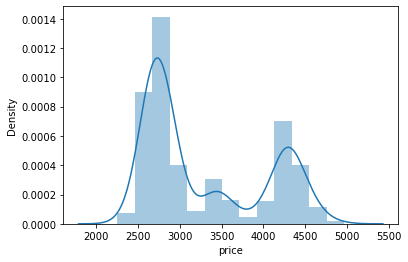

In [204]:
sns.distplot(Gold['price'])

<AxesSubplot:xlabel='date'>

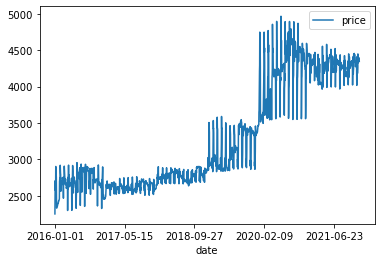

In [205]:
Gold.plot()

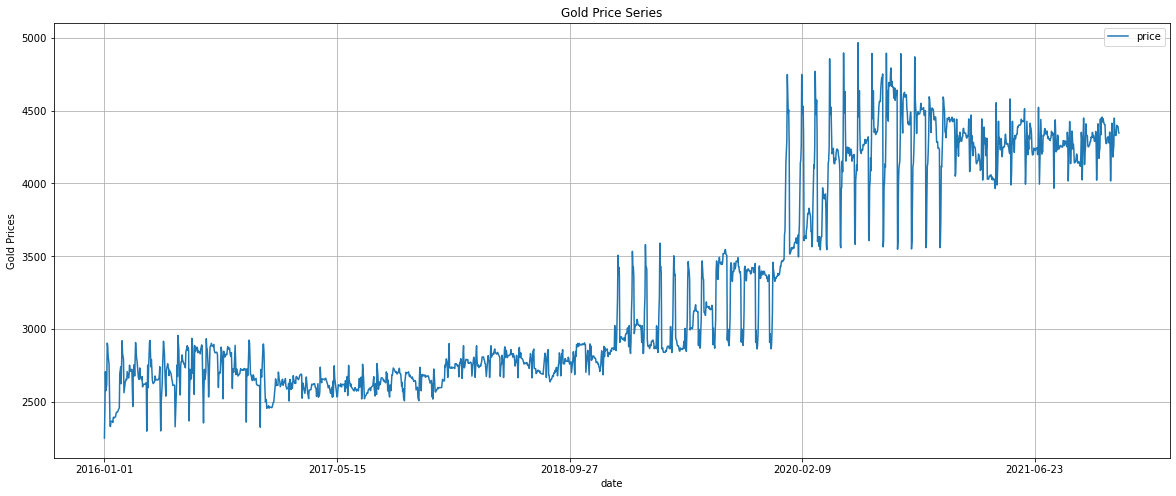

In [206]:
Gold.plot(figsize=(20,8))
plt.ylabel("Gold Prices")
plt.title("Gold Price Series")
plt.grid()
plt.show()

In [207]:
#This data have irregular trend with combination of linear & constant treand over the time

<AxesSubplot:xlabel='price'>

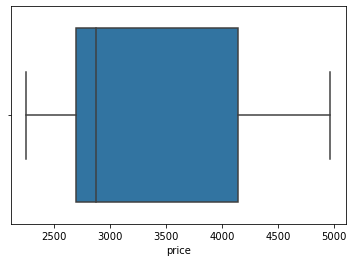

In [208]:
sns.boxplot(x=Gold['price'])

In [209]:
Gold.corr()

,price
price,1.0


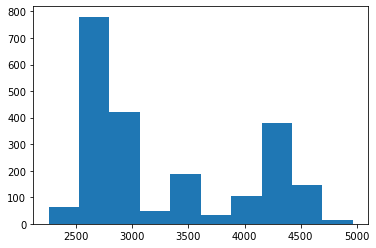

In [210]:
plt.hist(Gold["price"])
plt.show()

In [215]:
#Check Trend in data

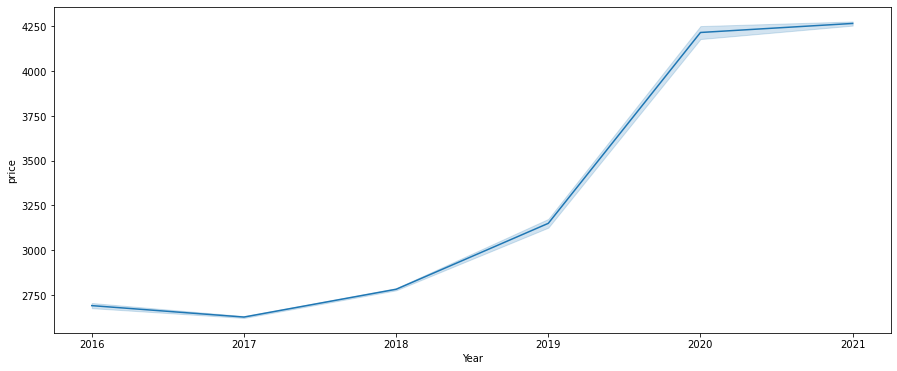

In [222]:
plt.figure(figsize=(15,6))
series1=sns.lineplot(x='Year',y='price',data=Gold)
plt.show(series1)


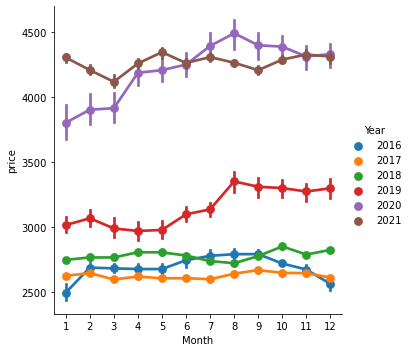

In [221]:
Gold['date'] = pd.to_datetime(Gold['date'])
Gold['Year'] = Gold['date'].dt.year
Gold['Month'] = Gold['date'].dt.month
Gold['weekday'] = Gold['date'].dt.weekday
Gold['weekday'] = np.where(Gold.weekday == 0, 7, Gold.weekday)
Gold['day'] = Gold['date'].dt.day
sns.factorplot(data = Gold, x ="Month", y = "price", hue = "Year")

In [261]:
#Let visualizing the sum of all sales each year. We can do that using group of “Price” and “Date” and group by “Year”.

In [565]:
data=Gold
Gold['Year'] = Gold['date'].dt.year
Gold['month'] = Gold['date'].dt.month
Gold['day'] = Gold['date'].dt.day
Gold['weekday'] = Gold['date'].dt.weekday
Gold['weekday'] = np.where(Gold.weekday == 0, 7, Gold.weekday)
Gold_Year = data[['price','Year']].groupby(by='Year').sum().reset_index()

Gold_Year

,Year,price
0,2016,9.847648e+05
1,2017,9.587369e+05
2,2018,1.015407e+06
3,2019,1.149827e+06
4,2020,1.543195e+06
5,2021,1.514739e+06


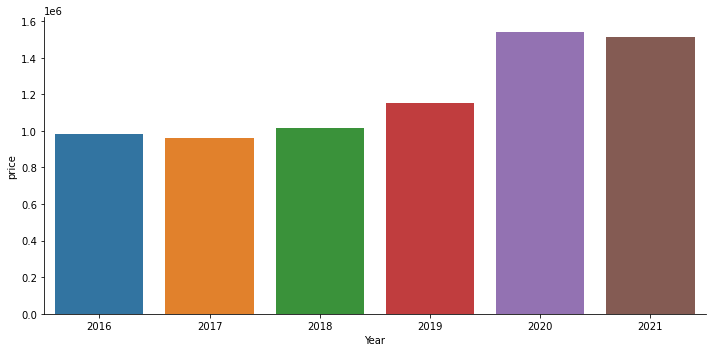

In [265]:
sns.catplot(x='Year',y='price',data=Gold_Year,kind='bar',aspect=2)

In [266]:
#Monthly & Yeary Gold Price (TREND & SEASONALITY)

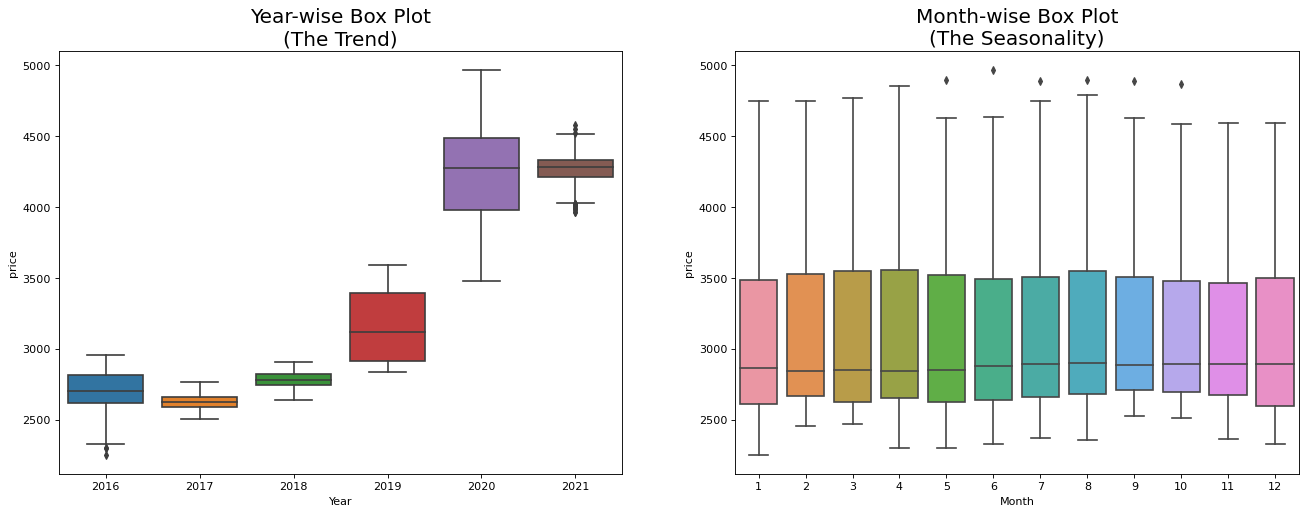

In [566]:
# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='Year', y='price', data=Gold, ax=axes[0])
sns.boxplot(x='Month', y='price', data=Gold.loc[~data.Year.isin([2018, 2021]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

In [268]:
#Inference: From the number of sales vs. year plot, we can infer an increasing trend over the years.
The aggregate number of sales has increased from approximately 32000 in 2018 to slightly over 52000 in 2020. 
A clear trend is captured by the lineplot above

In [269]:
#Weekly Gold Price

[Text(0.5, 1.0, 'Weekly Gold Price')]

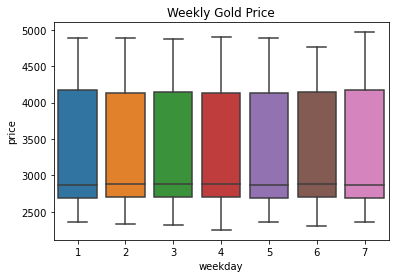

In [270]:
plot = sns.boxplot(x='weekday', y='price', data=Gold)
plot.set(title='Weekly Gold Price')

In [271]:
#Time Series Decomposition Plot

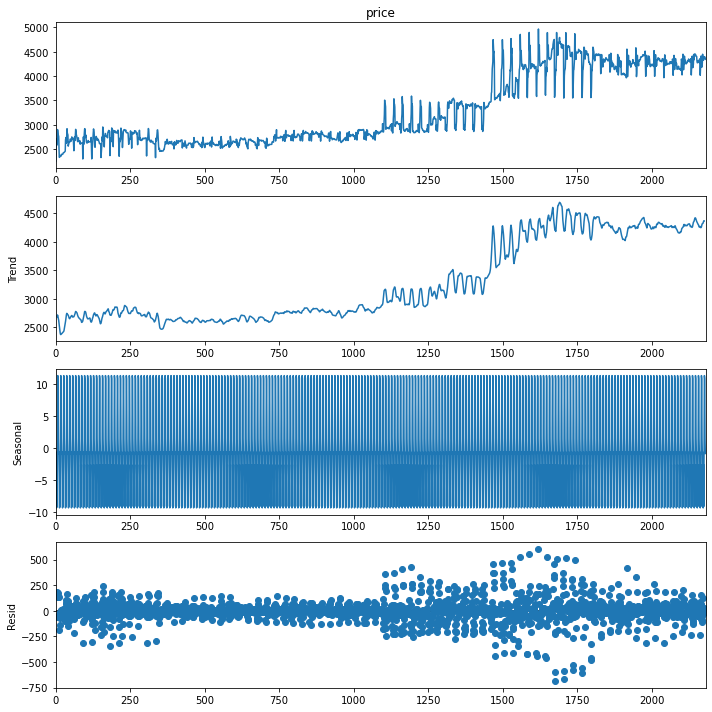

In [299]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib

Gold=Gold.sort_values(by='date', ascending=True)
Gold= Gold.loc[:, ~Gold.columns.str.contains('^Unnamed')]
Gold=Gold.set_index('date')

df1=data.sort_values(by='date', ascending=True)
matplotlib.rc('figure', figsize=(10, 10))
decompose = seasonal_decompose(df1.price, period=10, model='additive')
decompose.plot()
plt.show() 

In [300]:
#Determine Error, Trend and Seasonality An ETS model has three main components: error, trend, and seasonality.
Each can be applied either additively, multiplicatively, or not at all.
We will use the above Times Series Decomposition Plot to determine the additive or multiplicative property of the thre 
components.

Trend - If the trend plot is linear then we apply it additively (A).
If the trend line grows or shrinks exponentially, we apply it multiplicatively (M).
If there is no clear trend, no trend component is included (N).

Seasonal - If the peaks and valleys for seasonality are constant over time, we apply it additively (A). 
If the size of the seasonal fluctuations tends to increase or decrease with the level of time series, we apply 
it multiplicatively (M). 
If there is no seasonality, it is not applied (N).

Error - If the error plot has constant variance over time (peaks and valleys are about the same size), we apply
it additively (A). 
If the error plot is fluctuating between large and small errors over time, we apply it multiplicatively (M).

SyntaxError: invalid syntax (3307015892.py, line 2)

In [301]:
#Check Stationarity of a Time Series

In [315]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

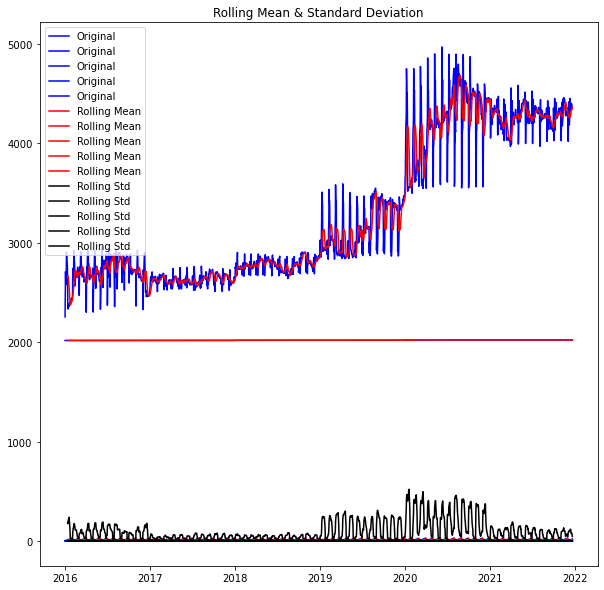

In [316]:
test_stationarity(Gold)

In [312]:
#Though the variation in standard deviation is small, mean is clearly increasing with time and this is not a stationary series

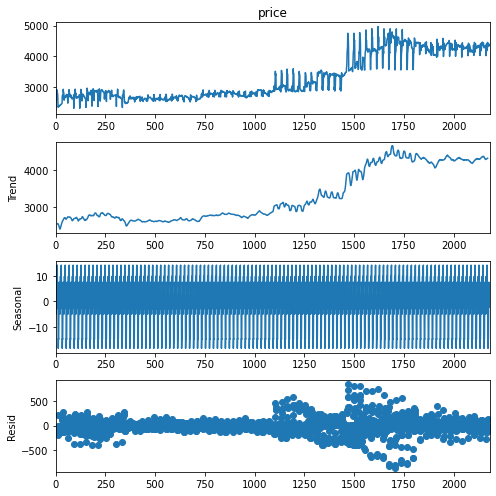

In [540]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib

df1=data.sort_values(by='date', ascending=True)
matplotlib.rc('figure', figsize=(7, 7))
decompose = seasonal_decompose(df1.price, period=20, model='additive')
decompose.plot()
plt.show() 

In [323]:
from sklearn.model_selection import train_test_split

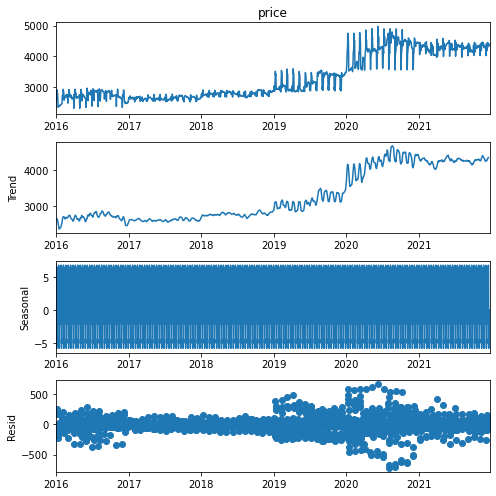

In [331]:
decompose_ts_add = seasonal_decompose(Gold.price,period=12)
decompose_ts_add.plot()
plt.show()

In [ ]:
#ADFULLER TEST

In [85]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(Gold.price.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -0.309904
p-value: 0.924090


In [86]:
#Since P-value is greater than the significance level, let’s difference the series and see how the autocorrelation plot looks like.

In [541]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize':(17,12), 'figure.dpi':120})

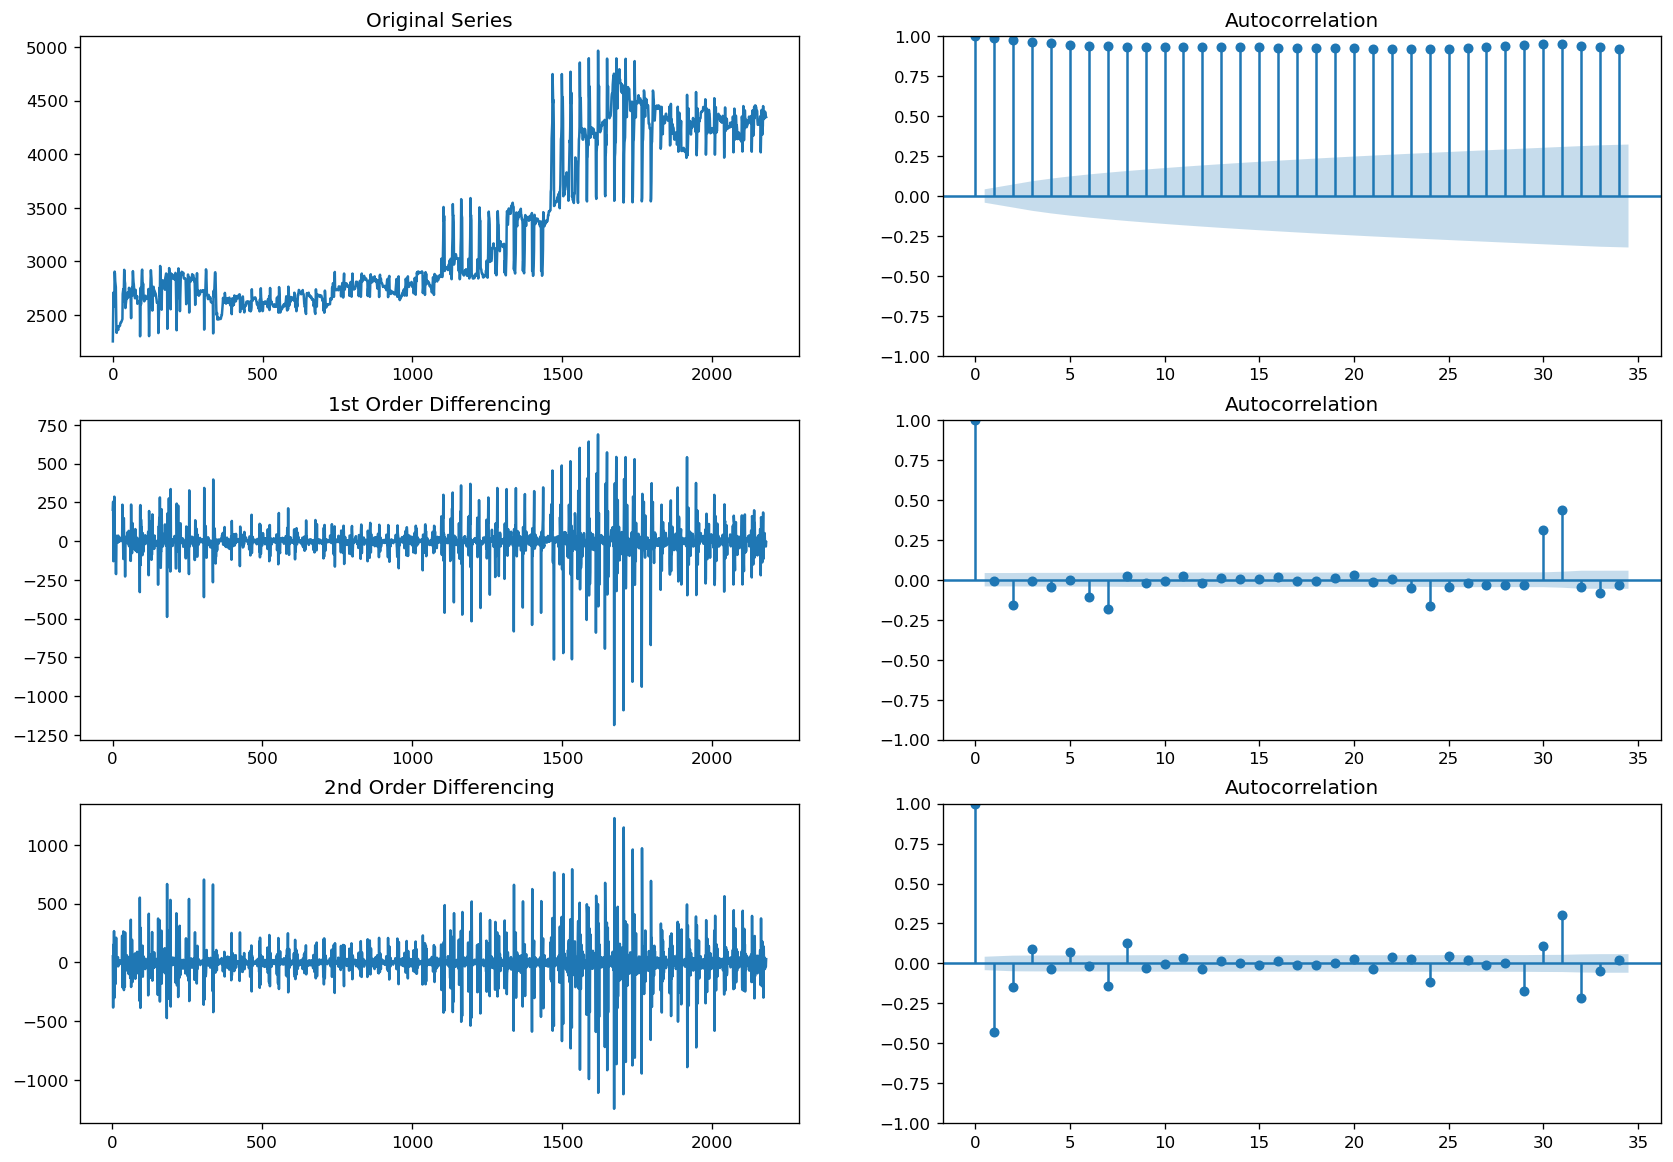

In [542]:
# Original Series
fig, axes = plt.subplots(3, 2)
axes[0, 0].plot(Gold.price); axes[0, 0].set_title('Original Series')
plot_acf(Gold.price, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(Gold.price.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(Gold.price.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(Gold.price.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(Gold.price.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

In [ ]:
#For the above series, the time series reaches stationarity with two orders of differencing. But on looking at the autocorrelation plot for the 2nd differencing the lag goes into the far negative zone fairly quick, which indicates, the series might have been over differenced.

So, I am going to tentatively fix the order of differencing as 1 even though the series is not perfectly stationary (weak stationarity).

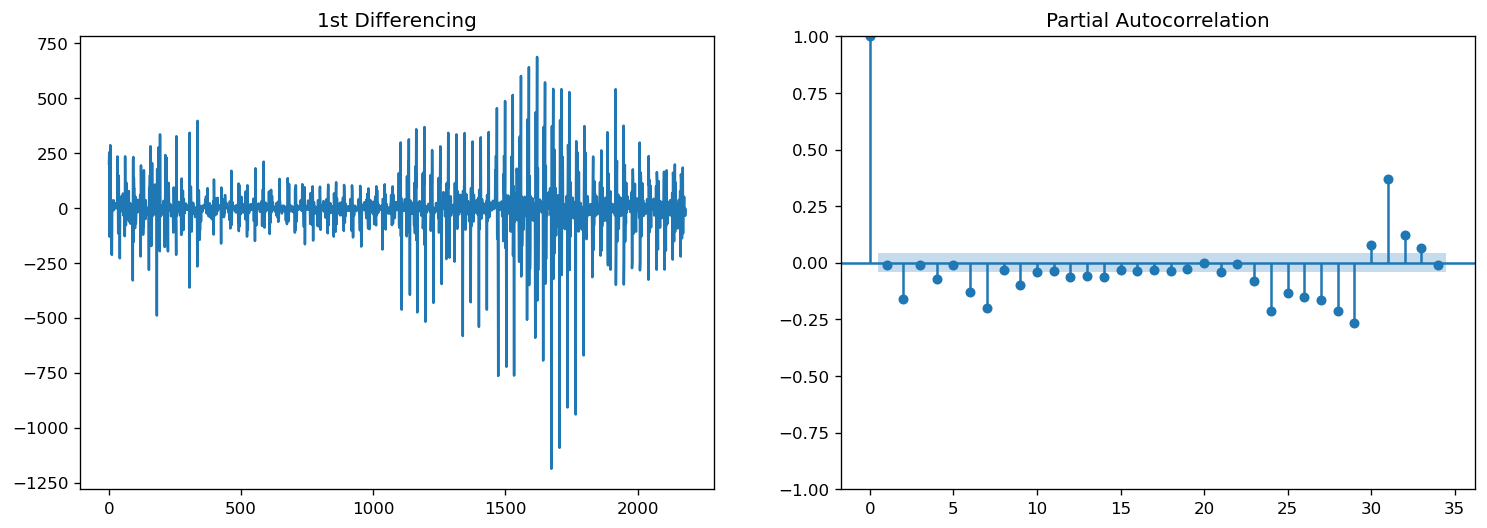

In [543]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(15,5), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2)
axes[0].plot(Gold.price.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(Gold.price.diff().dropna(), ax=axes[1])

plt.show()

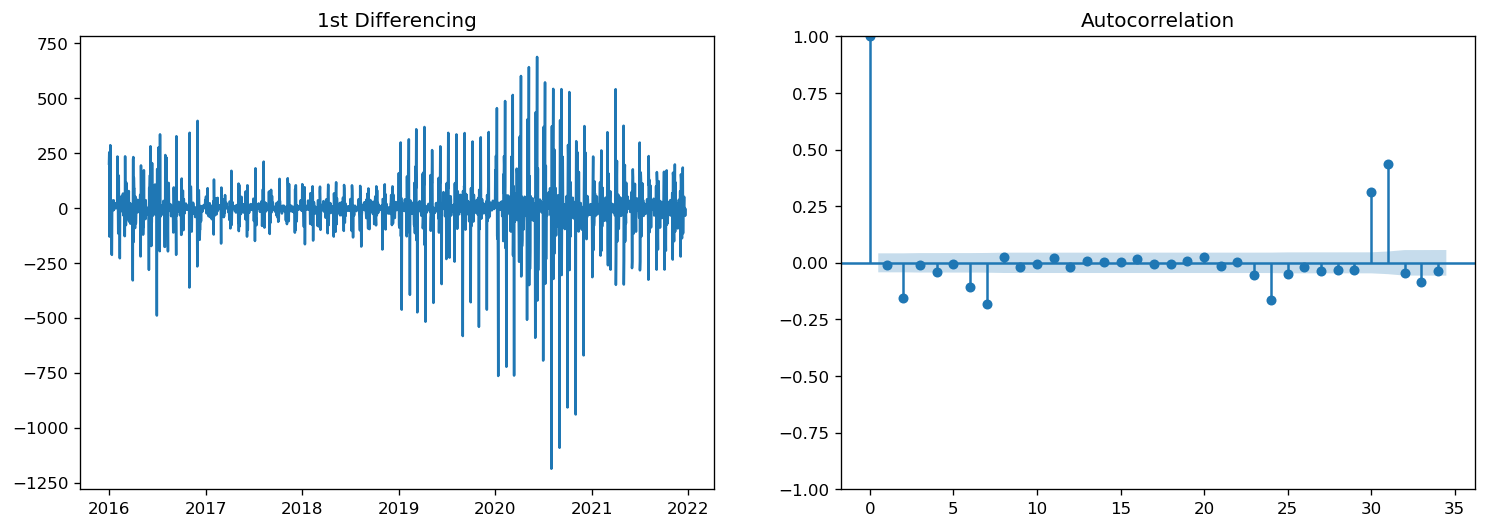

In [339]:
fig, axes = plt.subplots(1, 2)
axes[0].plot(Gold.price.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(Gold.price.diff().dropna(), ax=axes[1])

plt.show()

In [ ]:
#You can observe that the PACF lag 1 is quite significant since is well above the significance line. Lag 2 turns out to be significant as well, slightly managing to cross the significance limit (blue region). But I am going to be conservative and tentatively fix the p as 1.

In [316]:
#The residual errors seem fine with near zero mean and uniform variance. Let’s plot the actuals against the fitted values using plot_predict().

In [6]:
# making the month column as index
Gold.set_index('date',inplace=True)
Gold

,price
date,
2016-01-01,2252.60
2016-01-02,2454.50
2016-01-03,2708.10
2016-01-04,2577.80
2016-01-05,2597.75
...,...
2021-12-17,4394.40
2021-12-18,4389.50
2021-12-19,4389.50


In [254]:
model = ARIMA(train, order=(1, 1, 1))

In [255]:
fitted = model.fit()  

In [256]:
 conf = fitted.forecast(15, alpha=0.05)
   
   

In [257]:
se = fitted.forecast(15, alpha=0.05)

In [258]:
fc = fitted.forecast(15, alpha=0.05)

In [259]:
fc_series = pd.Series(fc, index=test.index)


In [260]:
model = ARIMA(train, order=(0, 1, 0))  
fitted = model.fit()

In [261]:
#Build ARIMA Model

In [42]:
from statsmodels.tsa.arima.model import ARIMA

In [263]:
len(Gold)

2182

In [17]:
train = Gold.price[:2000].astype('float32')
test = Gold.price[2000:].astype('float32')

In [18]:
model=ARIMA(train,order=(5,0,4)).fit()

In [19]:
#Predict test dataset

In [20]:
len(train),(len(Gold)-1)

(2000, 2181)

In [21]:
pred=model.predict(start=len(train),end=(len(Gold)-1))

In [22]:
pred.head()

2000    4238.928528
2001    4276.941908
2002    4279.613674
2003    4294.212103
2004    4308.464268
Name: predicted_mean, dtype: float64

In [23]:
#Model Evaluation

In [24]:
from sklearn.metrics import mean_squared_error

In [25]:
error=np.sqrt(mean_squared_error(test,pred))
error

182.0352019136836

In [26]:
test.mean(), np.sqrt(test.var())

(4281.390625, 94.20527992434926)

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
lower_series = pd.Series( index=test.index)


In [29]:
upper_series = pd.Series( index=test.index)

In [5]:
from statsmodels.tsa.arima.model import ARIMA

In [6]:
# 1,1,2 ARIMA Model
model = ARIMA(Gold.price, order=(1,1,2))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                 2182
Model:                 ARIMA(1, 1, 2)   Log Likelihood              -13313.984
Date:                Thu, 08 Dec 2022   AIC                          26635.968
Time:                        17:00:00   BIC                          26658.718
Sample:                             0   HQIC                         26644.285
                               - 2182                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7055      0.021     34.146      0.000       0.665       0.746
ma.L1         -0.7916      0.024    -32.492      0.000      -0.839      -0.744
ma.L2         -0.1646      0.020     -8.035      0.0

In [7]:
# 1,1,1 ARIMA Model
model = ARIMA(Gold.price, order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                 2182
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -13330.250
Date:                Thu, 08 Dec 2022   AIC                          26666.501
Time:                        17:00:24   BIC                          26683.563
Sample:                             0   HQIC                         26672.738
                               - 2182                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7809      0.015     53.844      0.000       0.752       0.809
ma.L1         -0.9676      0.006   -164.331      0.000      -0.979      -0.956
sigma2      1.192e+04    113.599    104.888      0.0

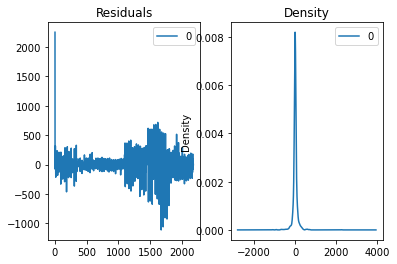

In [8]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [30]:
#The residual errors seem fine with near zero mean and uniform variance. Let’s plot the actuals against the fitted values using plot_predict().

In [9]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = Gold.price[:2000]
test = Gold.price[2000:]

In [10]:
# Build Model
# model = ARIMA(train, order=(3,2,1))  
model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit()

In [11]:
fc = fitted.forecast(1000, alpha=0.05)  # 95% conf

In [12]:
se = fitted.forecast(1000, alpha=0.05)  # 95% conf

In [13]:
conf = fitted.forecast(1000, alpha=0.05)  # 95% conf

In [14]:
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[0:,], index=test.index)
upper_series = pd.Series(conf[1:,], index=test.index)

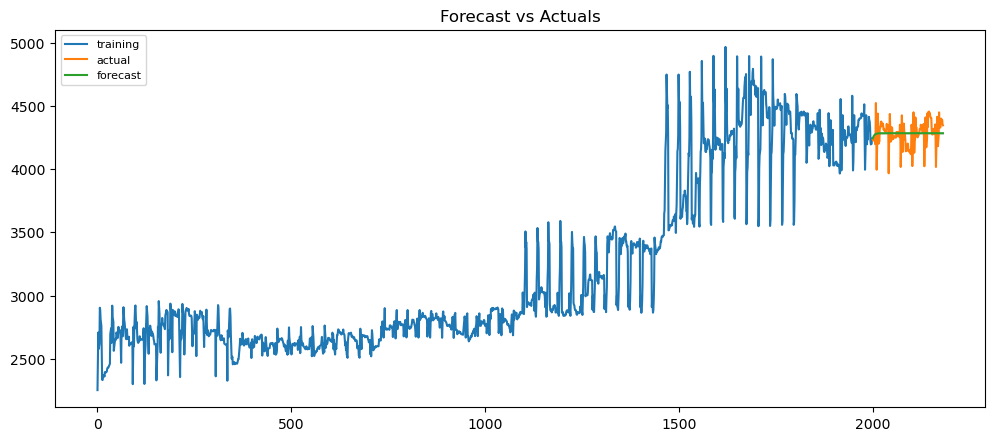

In [15]:
# Build Model
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
#From the chart, the ARIMA(1,1,1) model seems to give a directionally correct forecast. And the actual observed values lie within the 95% confidence band. That seems fine.

But each of the predicted forecasts is consistently below the actuals. That means, by adding a small constant to our forecast, the accuracy will certainly improve. So, there is definitely scope for improvement.

So, what I am going to do is to increase the order of differencing to two, that is set d=2 and iteratively increase p to up to 5 and then q up to 5 to see which model gives least AIC and also look for a chart that gives closer actuals and forecasts.

While doing this, I keep an eye on the P values of the AR and MA terms in the model summary. They should be as close to zero, ideally, less than 0.05.

                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                 2000
Model:                 ARIMA(3, 2, 1)   Log Likelihood              -12311.135
Date:                Thu, 08 Dec 2022   AIC                          24632.269
Time:                        17:03:30   BIC                          24660.269
Sample:                             0   HQIC                         24642.551
                               - 2000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0050      0.018     -0.281      0.779      -0.040       0.030
ar.L2         -0.1437      0.018     -8.036      0.000      -0.179      -0.109
ar.L3          0.0099      0.019      0.513      0.6

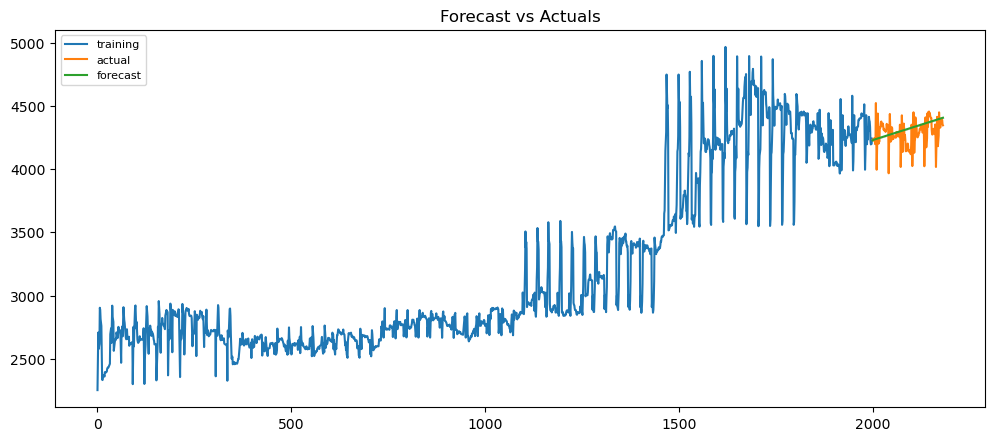

In [16]:
# Build Model
model = ARIMA(train, order=(3, 2, 1))  
fitted = model.fit()  
print(fitted.summary())

# Forecast
fc = fitted.forecast(2000, alpha=0.05)  # 95% conf
se = fitted.forecast(2000, alpha=0.05)  # 95% conf
conf = fitted.forecast(2000, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[0:], index=test.index)
upper_series = pd.Series(conf[1:], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
#The AIC has reduced to 440 from 515. Good. The P-values of the X terms are less the < 0.05, which is great.

So overall it’s much better.

Ideally, you should go back multiple points in time, like, go back 1, 2, 3 and 4 quarters and see how your forecasts are performing at various points in the year.

Here’s a great practice exercise: Try to go back 27, 30, 33, 36 data points and see how the forcasts performs. The forecast performance can be judged using various accuracy metrics discussed next.

In [102]:
#The model AIC has reduced, which is good. The P Values of the AR1 and MA1 terms have improved and are highly significant (<< 0.05).

In [148]:
#LSTM

In [183]:
from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler(feature_range=(0,1))
Gold=Scaler.fit_transform(np.array(Gold).reshape(-1,1))

In [184]:
Gold

array([[0.        ],
       [0.07440027],
       [0.16785201],
       ...,
       [0.78744887],
       [0.77440395],
       [0.77160335]])

In [185]:
Gold.shape

(2182, 1)

In [186]:
#splitting dataset into train and test split
training_size=int(len(Gold)*0.65)
test_size=len(Gold)-training_size
train_data,test_data=Gold[0:training_size,:],Gold[training_size:len(Gold),:1]

In [187]:
training_size,test_size

(1418, 764)

In [188]:
len(train_data),len(test_data)

(1418, 764)

In [189]:
import numpy
#convert an array of values into a dataset matrix
def create_dataset(dataset,time_step=1):
    dataX,dataY= [],[]
    for i in range (len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0] #i=0 ,0,1,2,3
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
        return numpy.array(dataX), numpy.array(dataY)

In [190]:
#reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train,Y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [191]:
print(X_train)

[[0.         0.07440027 0.16785201 0.11983639 0.12718797 0.13453956
  0.23996757 0.23407156 0.20680252 0.19685301 0.18690349 0.10922357
  0.03058555 0.02925895 0.04171426 0.04218103 0.0426478  0.04311457
  0.03935586 0.05214283 0.05269558 0.05074253 0.05186031 0.0529781
  0.05409588 0.06201865 0.0649298  0.0658142  0.0654457  0.06826473
  0.07108376 0.07390279 0.07672182 0.16309835 0.17159229 0.18008623
  0.13734016 0.19173085 0.24612153 0.21376718 0.20632347 0.19887976
  0.11452998 0.12417241 0.13381484 0.14345727 0.14493127 0.15005343
  0.14791613 0.16814681 0.16270529 0.15726376 0.15182224 0.1601135
  0.18432399 0.17205292 0.16877326 0.1705175  0.17226173 0.17400597
  0.1268379  0.07966982 0.16634116 0.17599587 0.18565059 0.15683384
  0.19921141 0.24158897 0.22272175 0.20385452 0.1961897  0.18201472
  0.16783973 0.15366474 0.14828463 0.14876368 0.17724877 0.15440174
  0.15209247 0.1497832  0.14747393 0.15561779 0.12927    0.13616096
  0.13527656 0.13564506 0.13601356 0.13638206 0.13

In [192]:
print(X_train.shape), print(y_test.shape)

(1, 100)
(1,)


(None, None)

In [193]:
#reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] ,1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1] ,1)

In [194]:
##Create the LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [195]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [196]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 100, 50)           10400     
                                                                 
 lstm_13 (LSTM)              (None, 100, 50)           20200     
                                                                 
 lstm_14 (LSTM)              (None, 50)                20200     
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [197]:
model.fit(X_train,Y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
1/1 [==============================] - 19s 19s/step - loss: 0.0292 - val_loss: 0.2160
Epoch 2/100
1/1 [==============================] - 0s 223ms/step - loss: 0.0198 - val_loss: 0.1505
Epoch 3/100
1/1 [==============================] - 0s 210ms/step - loss: 0.0115 - val_loss: 0.0871
Epoch 4/100
1/1 [==============================] - 0s 207ms/step - loss: 0.0044 - val_loss: 0.0320
Epoch 5/100
1/1 [==============================] - 0s 163ms/step - loss: 2.4294e-04 - val_loss: 0.0018
Epoch 6/100
1/1 [==============================] - 0s 180ms/step - loss: 0.0020 - val_loss: 1.5875e-04
Epoch 7/100
1/1 [==============================] - 0s 237ms/step - loss: 0.0051 - val_loss: 1.6470e-04
Epoch 8/100
1/1 [==============================] - 0s 263ms/step - loss: 0.0039 - val_loss: 0.0046
Epoch 9/100
1/1 [==============================] - 0s 241ms/step - loss: 0.0015 - val_loss: 0.0156
Epoch 10/100
1/1 [==============================] - 0s 244ms/step - loss: 2.0878e-04 - val_loss: 0

In [198]:
import tensorflow as tf

In [199]:
import sklearn
from sklearn.preprocessing import StandardScaler

In [200]:
#Lets do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

1/1 [==============================] - 0s 62ms/step


In [201]:
#Transform to original form
train_predict=Scaler.inverse_transform(train_predict)
test_predict=Scaler.inverse_transform(test_predict)

In [202]:
#Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(Y_train,train_predict))

2739.9382758934266

In [203]:
#Test data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

3178.835764675391

In [204]:
#Plotting
#shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(Gold)
trainPredictPlot[:, :] =np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict




In [205]:
#Shift test predictions for plotting
testPredictPlot=numpy.empty_like(Gold)
testpredictplot[:, :]=numpy.nan
testpredictplot[len(train_predict)+(look_back*2)+1:len(Gold)-1, :]=test_predict

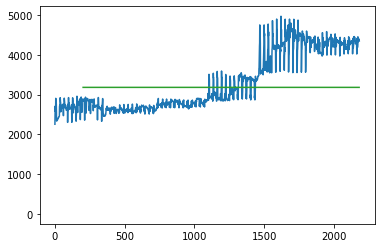

In [206]:
#plot baseline and predictions
plt.plot(Scaler.inverse_transform(Gold))
plt.plot(trainPredictplot)
plt.plot(testpredictplot)
plt.show()

In [207]:
len(test_data)

764

In [208]:
x_input=test_data[664:].reshape(1,-1)
x_input.shape

(1, 100)

In [210]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [211]:
temp_input

[0.7307734826988981,
 0.7430077016619374,
 0.7289309798430186,
 0.6960238788370121,
 0.6962818292368353,
 0.6994140840918304,
 0.6994140840918304,
 0.7080001474002284,
 0.7183918635073885,
 0.7133065556251612,
 0.6963923794081879,
 0.6950289272948373,
 0.6983085823783028,
 0.6983085823783028,
 0.6974241810074804,
 0.6908280207834323,
 0.6873272653572613,
 0.7125695544828095,
 0.7733721487268306,
 0.756236872167152,
 0.6529093120094336,
 0.7115746029406347,
 0.7671444890739578,
 0.8095220547591848,
 0.7633489331908465,
 0.6916755720971368,
 0.7252828241883775,
 0.7316210340126028,
 0.794745181855032,
 0.7667022883885468,
 0.76589158713196,
 0.7645649850757268,
 0.7396543464642371,
 0.7367800420090651,
 0.7367800420090651,
 0.7405755978921769,
 0.7422707005195857,
 0.7497881121715739,
 0.7500829126285147,
 0.7611010797066735,
 0.759995577993146,
 0.7599587279360283,
 0.7732247484983601,
 0.7606220289641448,
 0.7655967866750193,
 0.7612484799351438,
 0.7510041640564544,
 0.750635663485278

In [215]:
#demonstrate prediction for next 10 days
from numpy import array


In [228]:
#demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input=x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat=model.predict(x_input,verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
            x_input=x_input.reshape((1, n_steps,1))
            yhat=model.predict(x_input, verbose=0)
            print(yhat[0])
            temp_input.extend(yhat[0].tolist())
            print(len(temp_input))
            lst_output.extend(yhat.tolist())
            i=i+1
        
        
print(lst_output)
        
        


[0.39647943]
101
1 day input [0.7430077  0.72893098 0.69602388 0.69628183 0.69941408 0.69941408
 0.70800015 0.71839186 0.71330656 0.69639238 0.69502893 0.69830858
 0.69830858 0.69742418 0.69082802 0.68732727 0.71256955 0.77337215
 0.75623687 0.65290931 0.7115746  0.76714449 0.80952205 0.76334893
 0.69167557 0.72528282 0.73162103 0.79474518 0.76670229 0.76589159
 0.76456499 0.73965435 0.73678004 0.73678004 0.7405756  0.7422707
 0.74978811 0.75008291 0.76110108 0.75999558 0.75995873 0.77322475
 0.76062203 0.76559679 0.76124848 0.75100416 0.75063566 0.75063566
 0.7755463  0.73891735 0.65235656 0.7115746  0.76485979 0.79481888
 0.76334893 0.70748425 0.72476692 0.73338984 0.8064635  0.76681284
 0.81000111 0.81000111 0.81180676 0.79920404 0.80745845 0.79990419
 0.79503998 0.79286583 0.79286583 0.75859528 0.74525556 0.7447028
 0.74647161 0.76025353 0.76143273 0.76143273 0.75590522 0.74599256
 0.7740723  0.73165788 0.65021926 0.7067104  0.75649482 0.79632973
 0.76161698 0.71080075 0.72476692 0

In [287]:
Gold_new=np.arange(1,101)
Gold_pred=np.arange(101,131)

In [288]:
import matplotlib.pyplot as plt

In [289]:
len(Gold)

2182

In [290]:
Gold2=Gold.tolist()
Gold2.extend(lst_output)

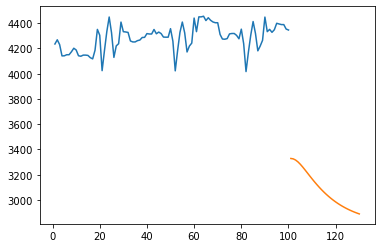

In [293]:
plt.plot(Gold_new,Scaler.inverse_transform(Gold[2082:]))
plt.plot(Gold_pred,Scaler.inverse_transform(lst_output))

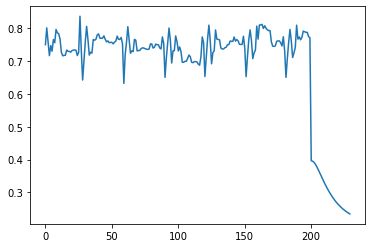

In [296]:
Gold3=Gold.tolist()
Gold3.extend(lst_output)
plt.plot(Gold3[1982:])

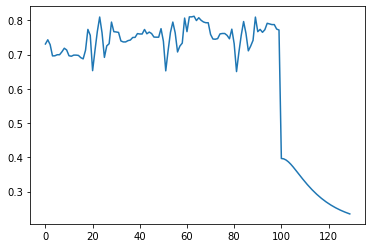

In [299]:
Gold3=Gold.tolist()
Gold3.extend(lst_output)
plt.plot(Gold3[2082:])